In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
movies = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/IMDB%20data%20from%202006%20to%202016/IMDB-Movie-Data.csv")

In [3]:
movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [4]:
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
df=movies[~movies['Revenue (Millions)'].isnull()].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                872 non-null    int64  
 1   Title               872 non-null    object 
 2   Genre               872 non-null    object 
 3   Description         872 non-null    object 
 4   Director            872 non-null    object 
 5   Actors              872 non-null    object 
 6   Year                872 non-null    int64  
 7   Runtime (Minutes)   872 non-null    int64  
 8   Rating              872 non-null    float64
 9   Votes               872 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 88.6+ KB


In [6]:
max_metascore =df['Metascore'].mean()
df.Metascore.fillna(max_metascore,inplace=True)

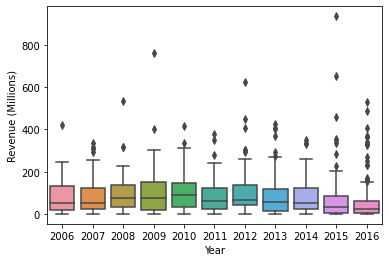

In [7]:
sns.boxplot(data=df,x='Year', y='Revenue (Millions)')
plt.show()

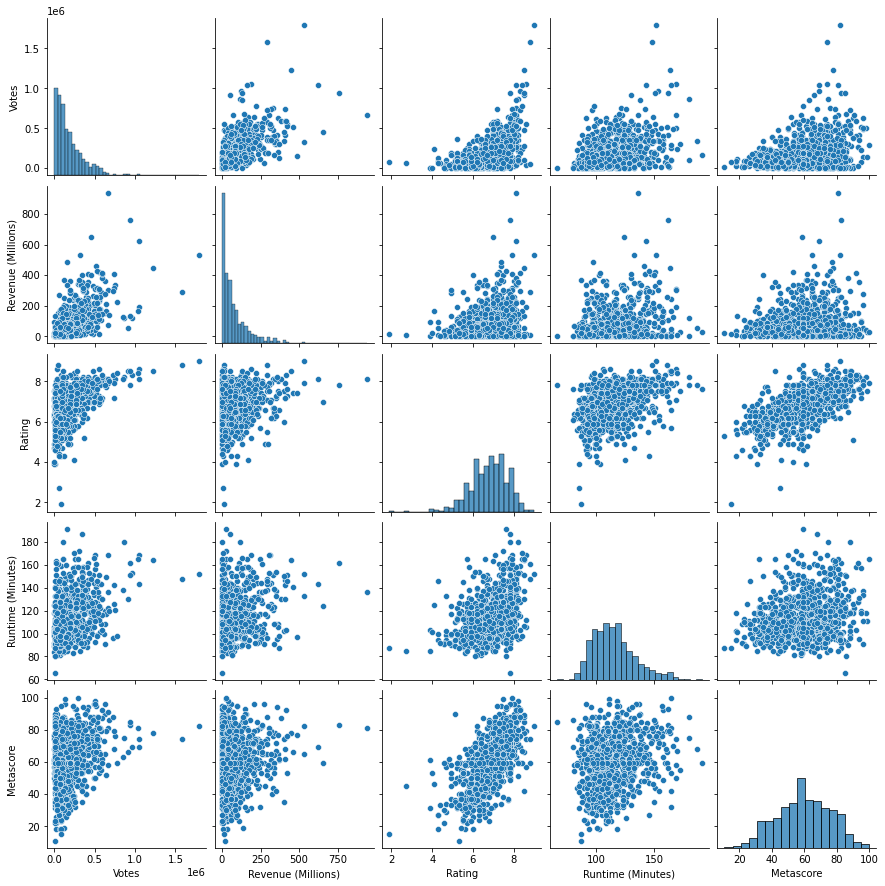

In [8]:
df['cnt']=1
sns.pairplot(data=df, vars=["Votes", "Revenue (Millions)","Rating",
                            "Runtime (Minutes)","Metascore"])
plt.show()

In [9]:
px.scatter(df,x='Revenue (Millions)',y='Votes',size='Votes', 
           color = 'Rating',hover_name='Title',animation_frame='Year',
           title="Distribution of Revenue and Votes")

In [10]:
df[['Genre1', 'Genre2','Genre3']] = df['Genre'].str.split(',', 3, expand=True).fillna(value="")
df[['Actor1', 'Actor2','Actor3']] = df['Actors'].str.split(',', 2,expand=True).fillna(value="")
df['Genre2']=df['Genre2'].fillna(df.Genre1, inplace=True)
df['Genre3']=df['Genre3'].fillna(df.Genre1,inplace=True)
df_by_genre1 = df.groupby('Genre1')
df_by_genre2 = df.groupby('Genre2')
df_by_genre3 = df.groupby('Genre3')
agg_genre1=df_by_genre1.sum()
agg_genre2=df_by_genre2.sum()
agg_genre3=df_by_genre3.sum()
ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp=final_genre.reset_index().head(10)
genre_temp

,Genre1,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,cnt
0,Action,116887.0,555447.0,32613.0,1832.2,68054324.0,33697.82,14823.601432,276.0
1,Adventure,33383.0,142862.0,8536.0,495.0,16911278.0,8055.20,4401.725537,71.0
2,Animation,22728.0,94592.0,4591.0,343.7,10192662.0,8987.50,3295.150358,47.0
3,Biography,30041.0,120799.0,7398.0,442.9,9743517.0,3357.27,4122.875895,60.0
4,Comedy,89117.0,313969.0,16831.0,1022.3,19948763.0,8046.83,8808.875895,156.0
5,Crime,28089.0,108634.0,6471.0,379.8,10459846.0,2216.35,3393.575179,54.0
6,Drama,79019.0,313932.0,18325.0,1100.6,24137985.0,5596.42,10207.601432,156.0
7,Fantasy,1367.0,4020.0,195.0,13.3,354186.0,126.22,121.000000,2.0
8,Horror,20045.0,70448.0,3521.0,213.5,3448962.0,1398.14,1904.575179,35.0
9,Mystery,6422.0,22129.0,1212.0,76.0,2823557.0,708.17,648.000000,11.0


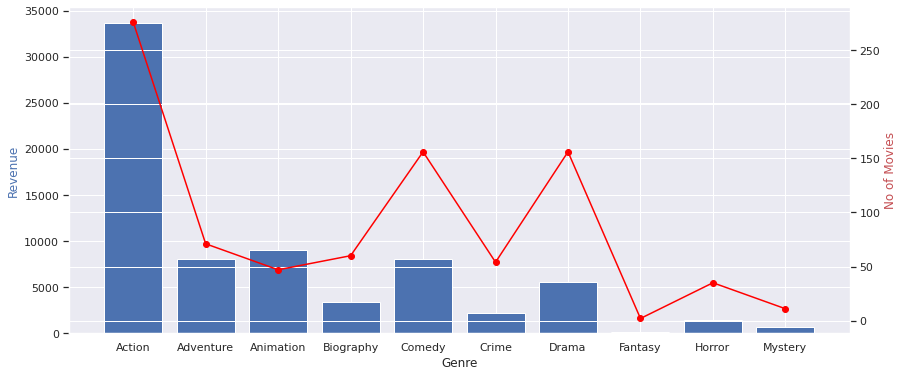

In [11]:
sns.set(style="darkgrid")
fig, ax1 = plt.subplots(figsize = (14,6))

ax2 = ax1.twinx()
ax1.bar(genre_temp['Genre1'],genre_temp['Revenue (Millions)'])
ax2.plot(genre_temp['Genre1'],genre_temp['cnt'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Revenue', color='b')
ax2.set_ylabel('No of Movies', color='r')
plt.show()

In [12]:
df_year = df.groupby('Year')['cnt'].count().reset_index()
px.line(df_year, x='Year',y='cnt',template='plotly_dark',text='cnt',
        title="No of releases in Year")

In [13]:
df_Rev = df.groupby('Year')['Revenue (Millions)'].sum().round(1).reset_index()
px.line(df_Rev, x='Year',y='Revenue (Millions)',template='plotly_dark',text='Revenue (Millions)',
        title="Revenue in Years")

In [14]:
df_2016 = df[df['Year']==2016].copy()
df_temp=df_2016.sort_values(by='Revenue (Millions)',ascending = False).head(10)
px.bar(df_temp,y='Revenue (Millions)',x='Title',color='Genre1',text='Rating',
       title='Most successful Movies/Genre of Year:2016')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



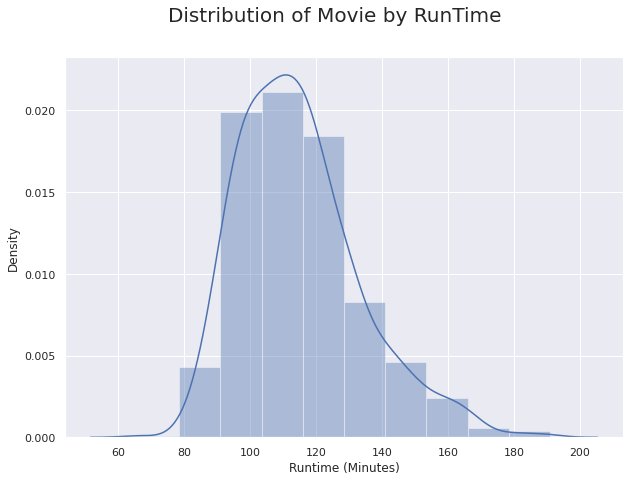

In [15]:
plt.figure(figsize=(10,7),facecolor='white')
sns.distplot(df['Runtime (Minutes)'],bins=10,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

In [16]:
movies_Rev=df.sort_values(by='Revenue (Millions)',ascending = False)[0:10]
px.pie(movies_Rev, values='Revenue (Millions)', names='Actor1',title='Actors vs Revenue Distribution')

In [17]:
px.pie(movies_Rev, values='Revenue (Millions)', names='Title', title='Movies vs Revenue Distribution')

In [18]:
px.bar(movies_Rev,x='Actor1',y='Revenue (Millions)',color='Votes',
       hover_name='Title', text='Rating',template='plotly_dark')

In [19]:
top_director= df.groupby('Director')['Revenue (Millions)'].sum().reset_index()
top_director.sort_values('Revenue (Millions)',ascending =False)[0:5]

,Director,Revenue (Millions)
204,J.J. Abrams,1683.45
129,David Yates,1630.51
90,Christopher Nolan,1515.09
349,Michael Bay,1421.32
159,Francis Lawrence,1299.81


In [20]:
px.bar(movies_Rev,x='Director',y='Revenue (Millions)',
       color='Metascore',hover_name='Title',
       template='plotly_dark',text='Revenue (Millions)', title='Top Directors and Revenue Distribution by Metascore')

In [21]:
movies_Votes=df.sort_values(by='Votes',ascending = False)[0:20]

px.bar(movies_Votes,x='Actor1',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Rating',template='plotly_dark',
      title='Most Popular/Voted Actors')

In [22]:
px.bar(movies_Votes,x='Title',y='Votes',color='Revenue (Millions)',
       hover_name='Title',text='Metascore',template='plotly_dark',
      title='Most Popular/Voted Movies')

In [23]:
top_Actor = pd.pivot_table(df,index=['Actor1'],
                           values=['Revenue (Millions)','Metascore','Votes','Rating','cnt'],
                           aggfunc={'Revenue (Millions)':np.sum,'Metascore':np.mean,
                                    'Votes':np.mean,'Rating':np.mean,'cnt':np.sum})
actor = top_Actor.sort_values(by='Revenue (Millions)',
                              ascending = False).reset_index()[0:20]
actor

,Actor1,Metascore,Rating,Revenue (Millions),Votes,cnt
0,Robert Downey Jr.,60.750000,7.512500,2564.58,556738.500000,8
1,Jennifer Lawrence,61.666667,6.950000,1607.87,347564.666667,6
2,Christian Bale,69.181818,7.318182,1559.62,492911.909091,11
3,Will Smith,50.063909,6.977778,1340.28,275772.666667,9
4,Johnny Depp,56.946897,6.800000,1280.94,307826.625000,8
5,Daniel Radcliffe,63.142857,7.157143,1279.28,262638.571429,7
6,Shia LaBeouf,48.115036,6.580000,1254.36,310977.400000,5
7,Chris Pratt,72.666667,7.633333,1243.07,492917.000000,3
8,Kristen Stewart,57.500000,5.483333,1221.95,198119.166667,6
9,Leonardo DiCaprio,68.666667,7.922222,1117.86,654595.333333,9


In [24]:
px.scatter(actor,y= 'Revenue (Millions)',x= 'Rating', 
           color= 'cnt',size='Rating',text='Actor1',
           title='Revenue Vs Rating of most Popular Actor and No of Movies')

In [25]:
px.histogram(df, x='Metascore',y='Revenue (Millions)',title='Impact of Metascore on Revenue')